[MIT License](https://github.com/cdslaborg/paramonte#license)  
[ParaMonte: plain powerful parallel Monte Carlo library](https://github.com/cdslaborg/paramonte).  
Copyright (C) 2012-present, [The Computational Data Science Lab](https://www.cdslab.org/#about)  
https://github.com/cdslaborg/paramonte  
[References](https://www.cdslab.org/paramonte/notes/overview/preface/#how-to-acknowledge-the-use-of-the-paramonte-library-in-your-work)  

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
%matplotlib notebook
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import paramonte as pm
import matplotlib as mpl
import matplotlib.pyplot as plt
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

numpy 1.19.2
scipy 1.5.2
pandas 1.1.3
seaborn 0.11.0
paramonte 2.3.0
matplotlib 3.3.2


## Sampling a univariate normal distribution via the ParaMonte library's ParaDRAM routine    

> For a more comprehensive discussion of different aspects and attributes of the sampler and how to run the simulation in parallel, see [the multivariate Normal distribution Jupyter Notebook example](https://nbviewer.jupyter.org/github/cdslaborg/paramontex/blob/master/Python/Jupyter/sampling_multivariate_normal_distribution_via_paradram/sampling_multivariate_normal_distribution_via_paradram.ipynb) in the same folder as this Jupyter file exists.  

Suppose we want to sample random points from a [standard univariate Gaussian function](https://en.wikipedia.org/wiki/Normal_distribution). The following Python function `getLogFunc()` returns the natural logarithm of the Probability Density Function of the univariate standard Gaussian distribution.

In [3]:
import numpy as np
logSqrt2Pi = np.log(np.sqrt(2*np.pi))
def getLogFunc(x): return -0.5*x**2 - logSqrt2Pi

---  

> Since the mathematical objective functions (e.g., probability density functions) can take extremely small or large values, we often work with their natural logarithms instead. **This is the reason behind the naming convention used in the ParaMonte library for** the user's objective functions: **getLogFunc**, implying that **the user must provide a function that returns the natural logarithm of the target objective function**.  
  
  
See [this Jupyter Notebook](https://nbviewer.jupyter.org/github/cdslaborg/paramontex/blob/master/Python/Jupyter/working_with_logarithm_of_objective_function/working_with_logarithm_of_objective_function.ipynb) for an in-depth discussion of why we need to work with the logarithm of mathematical objective functions in optimization and sampling problems.  

---  

We will sample random points from this objective function by calling the **ParaDRAM** sampler (**Delayed-Rejection Adaptive Metropolis-Hastings Markov Chain Monte Carlo sampler**) of the ParaMonte library.  

The simplest scenario would be to run the simulation with the default specifications that are appropriately determined by the ParaDRAM sampler.  
>**To run the sampler in parallel**, you will have to first save the MPI-enabled script as an external file. Visit the [ParaMonte library's documentation website](http://cdslab.org/paramonte/notes/run/python/) for more information, or see [this parallel ParaDRAM simulation Jupyter notebook example](https://nbviewer.jupyter.org/github/cdslaborg/paramontex/blob/master/Python/Jupyter/sampling_multivariate_normal_distribution_via_paradram_parallel/sampling_multivariate_normal_distribution_via_paradram_parallel.ipynb).  

However, for further clarity of this particular example, we will specify an output folder for the automatically-named output files of the simulation.  

In [4]:
import paramonte as pm

print( pm.version.interface.get() )
print( pm.version.kernel.get() )

pm.checkForUpdate() # check for new versions of the ParaMonte library

pmpd = pm.ParaDRAM()         # define a ParaMonte sampler instance
pmpd.spec.chainSize = 10000  # request a much smaller sample size than the default value (100000)
pmpd.spec.randomSeed = 31951 # initialize the random seed to generate reproducible results
pmpd.spec.overwriteRequested = True # overwrite existing old simulation files with the same names
pmpd.spec.outputFileName = "./out/gaussian" # output files prefix

# run the ParaDRAM sampler

pmpd.runSampler ( ndim = 1
                , getLogFunc = getLogFunc
                )

ParaMonte Python Interface Version 2.3.0
ParaMonte Python Kernel Version 1.4.0

ParaMonte - NOTE: You have the latest version of the ParaMonte library. 
ParaMonte - NOTE: To see the most recent changes to the library, visit, 
ParaMonte - NOTE: 
ParaMonte - NOTE:     https://www.cdslab.org/paramonte/notes/overview/paramonte-python-release-notes


ParaDRAM - NOTE: Running the ParaDRAM sampler in serial mode...
ParaDRAM - NOTE: To run the ParaDRAM sampler in parallel mode visit:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     https://www.cdslab.org/paramonte
ParaDRAM - NOTE: 
ParaDRAM - NOTE: If you are using Jupyter notebook, check the Jupyter's 
ParaDRAM - NOTE: terminal window for realtime simulation progress and report.


ParaDRAM - NOTE: To read the generated output files, try:
ParaDRAM - NOTE: 
ParaDRAM - NOTE:     pmpd.readReport()      # to read the summary report from the output report file.
ParaDRAM - NOTE:     pmpd.readSample()      # to read the final i.i.d. sample from the output samp

The realtime simulation progress information will printed on your **Anaconda prompt window** (NOT inside your Jupyter notebook). Once the simulation is finished, the ParaDRAM routine generates 5 output files, each of which contains information about certain aspects of the simulation, [all available here to view](https://github.com/cdslaborg/paramontex/tree/master/Python/Jupyter/sampling_univariate_gaussian_distribution_via_paradram/out).  

In [5]:
pmpd.readSample()
sample = pmpd.sampleList[0] # shorten the component name to work with.


ParaDRAM - WARNING: The ``delimiter`` is neither given as input to ``readSample()``
ParaDRAM - WARNING: nor set as a simulation specification of the ParaDRAM object. 
ParaDRAM - WARNING: This information is essential, otherwise how could the output files be parsed?
ParaDRAM - WARNING: For now, the ParaDRAM sampler will assume a comma-separated 
ParaDRAM - WARNING: file format for the contents of the sample file(s) to be parsed.


ParaDRAM - NOTE: 1 files detected matching the pattern: "./out/gaussian*_sample.txt"


ParaDRAM - NOTE: processing sample file: D:\Dropbox\Projects\20180101_ParaMonte\paramontex\Python\Jupyter\sampling_univariate_gaussian_distribution_via_paradram\out\gaussian_process_1_sample.txt
ParaDRAM - NOTE: reading the file contents... done in 0.015949 seconds.
ParaDRAM - NOTE: ndim = 1, count = 5014
ParaDRAM - NOTE: parsing file contents... 
ParaDRAM - NOTE: computing the sample correlation matrix... 
ParaDRAM - NOTE: adding the correlation graphics tools... 
ParaDRAM

To quickly visualize the generated sample as a histogram, try,

ParaDRAM - NOTE: making the histplot plot... 

<IPython.core.display.Javascript object>


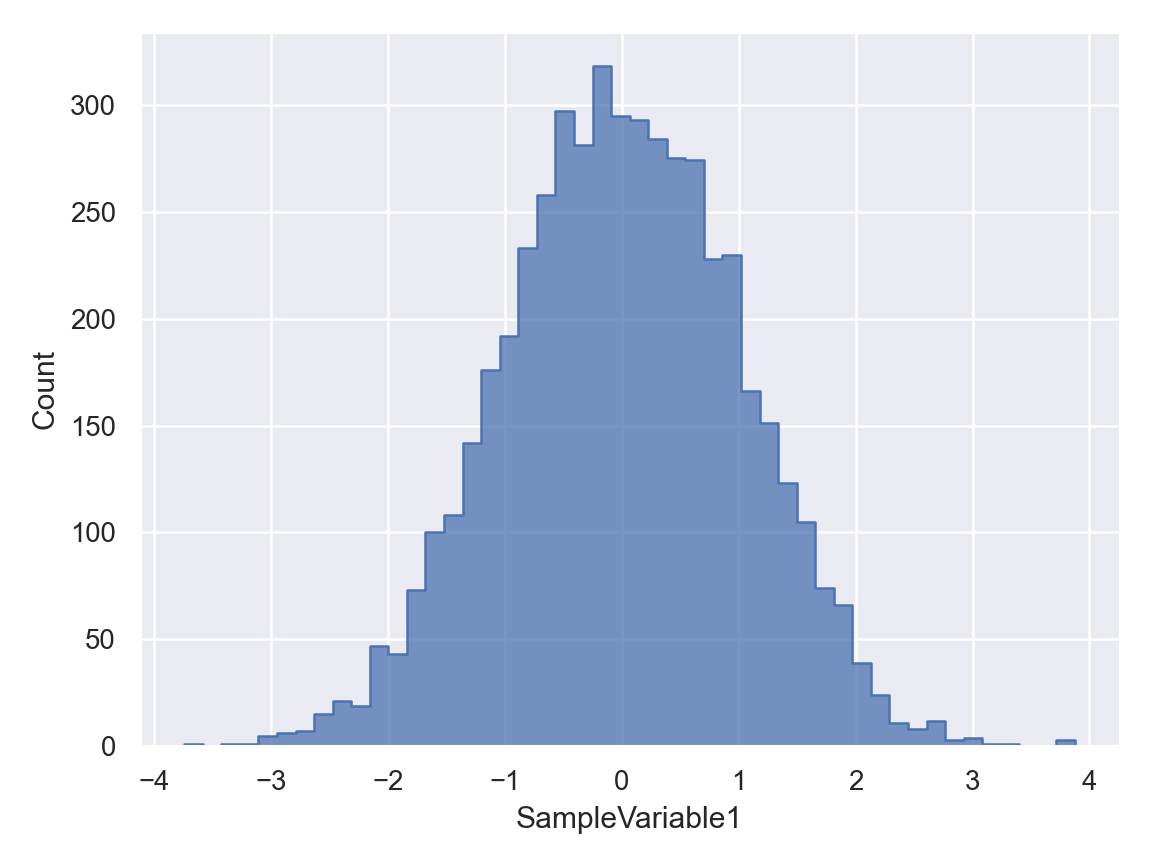

done in 0.152592 seconds.


In [6]:
sample.plot.histplot()

If the variable names are specified for the sampler before running the simulations, the sampler will automatically assign names to each variable. To change the x-label, for example, you can try the following,

ParaDRAM - NOTE: making the histplot plot... 

<IPython.core.display.Javascript object>


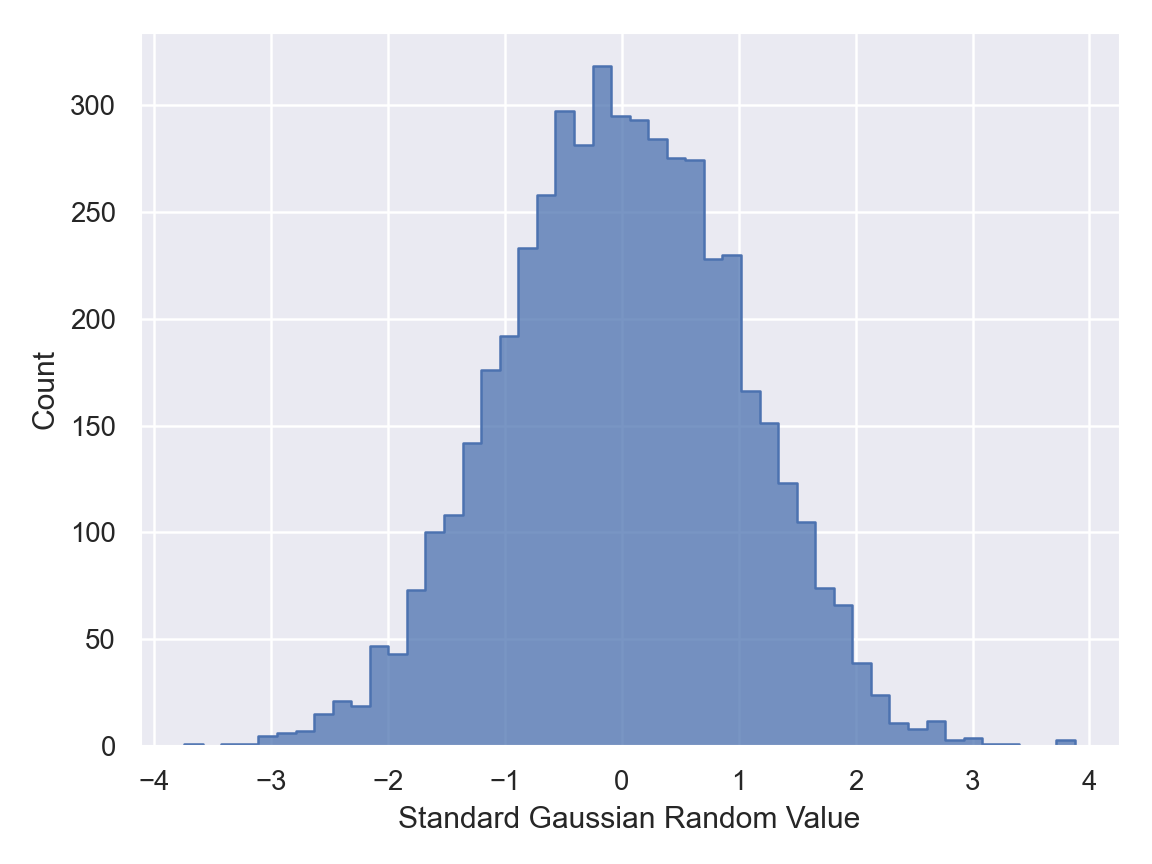

done in 0.098735 seconds.


Text(0.5, 31.07499999999998, 'Standard Gaussian Random Value')

In [7]:
sample.plot.histplot()
sample.plot.histplot.currentFig.axes.set_xlabel("Standard Gaussian Random Value")

We can also add target values to the plot (we can also reset the plot to the default settings, which we do here), 

ParaDRAM - NOTE: making the histplot plot... 

<IPython.core.display.Javascript object>


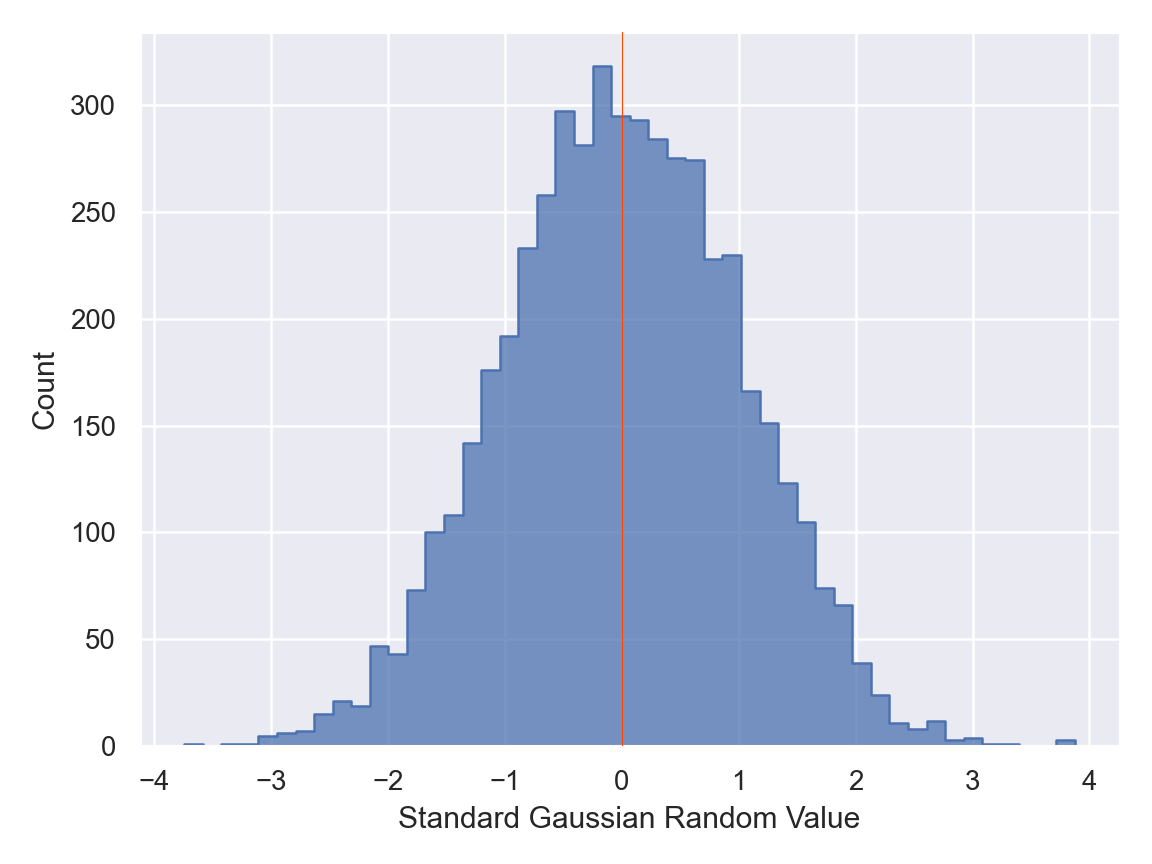

done in 0.101773 seconds.


In [8]:
sample.plot.histplot.reset()
sample.plot.histplot()
sample.plot.histplot.currentFig.axes.set_xlabel("Standard Gaussian Random Value")
sample.plot.histplot.target() # add a line corresponding to the maxLogFunc (mode) of the sampled points.

By default, if no target value is specified, the mode of the sampled states will be used the target value. We can also add any other value of interest. For example, let's add the 1-sigma standard deviation lines to the plot,

ParaDRAM - NOTE: making the histplot plot... 

<IPython.core.display.Javascript object>


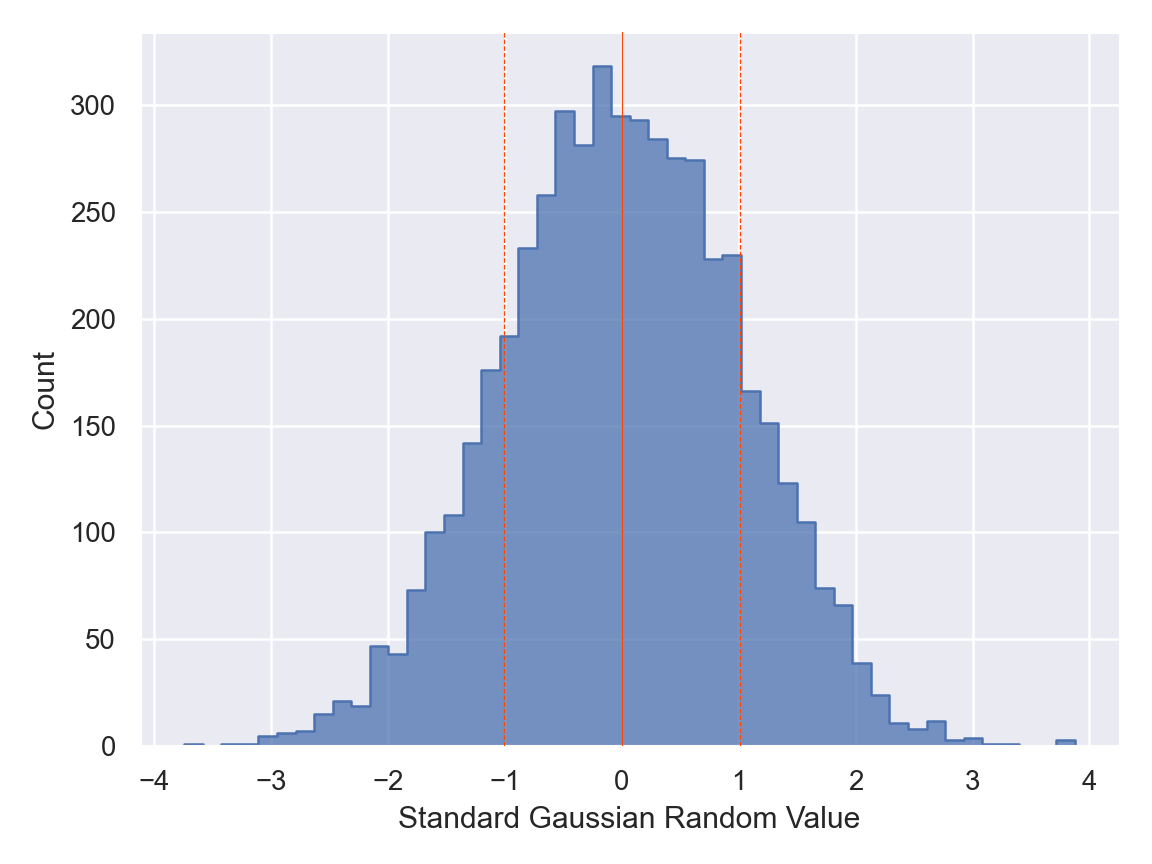

done in 0.100718 seconds.


In [9]:
sample.plot.histplot.reset()
sample.plot.histplot()
sample.plot.histplot.currentFig.axes.set_xlabel("Standard Gaussian Random Value")

avg = sample.df["SampleVariable1"].mean()
sample.plot.histplot.target( value = avg )

std = sample.df["SampleVariable1"].std()
sample.plot.histplot.target.axvline.kws.linestyle = "--"
sample.plot.histplot.target( value = avg - std )
sample.plot.histplot.target( value = avg + std )

In the above figure, we are now showing the mean and the 1-sigma distribution of the sampled points around the mean.

To make a trace-plot of the sample, try,  

ParaDRAM - NOTE: making the line plot... 

<IPython.core.display.Javascript object>


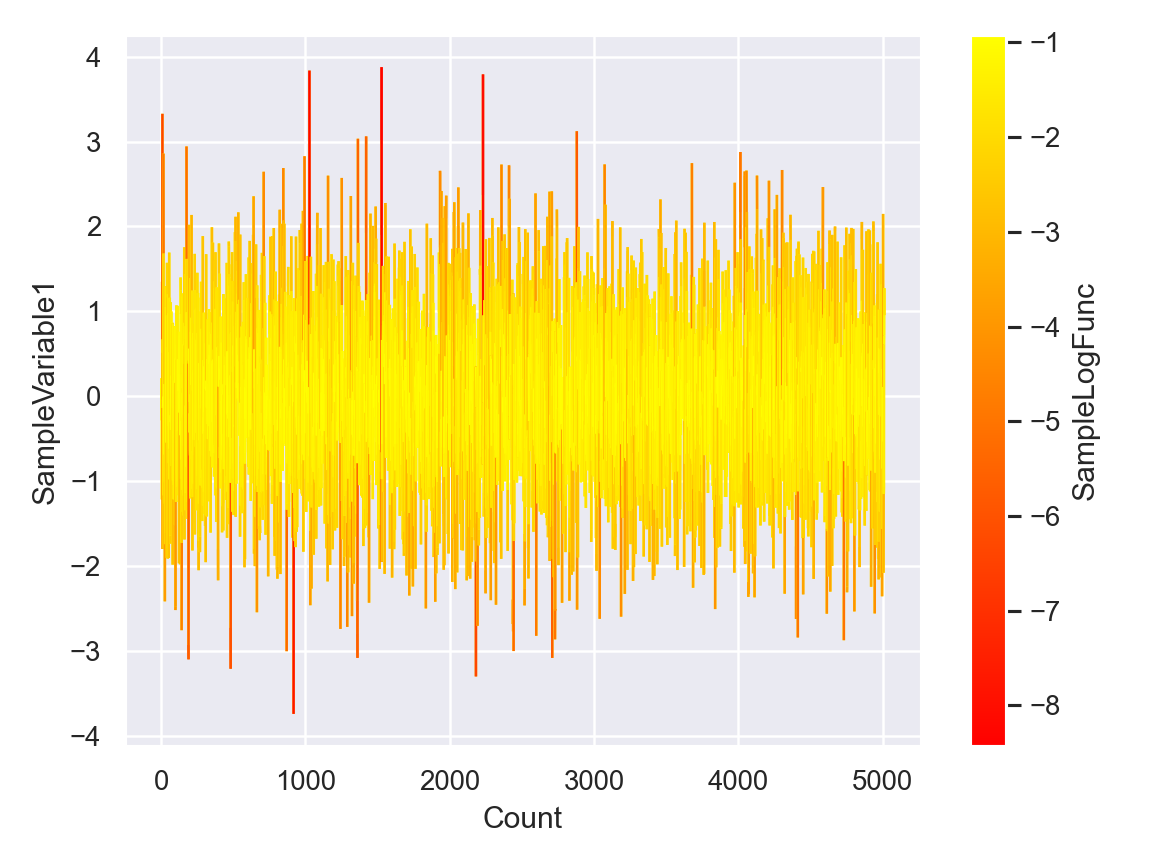

done in 0.160601 seconds.


In [10]:
sample.plot.line()

To change the scale of the x-axis, try,  

ParaDRAM - NOTE: making the line plot... 

<IPython.core.display.Javascript object>


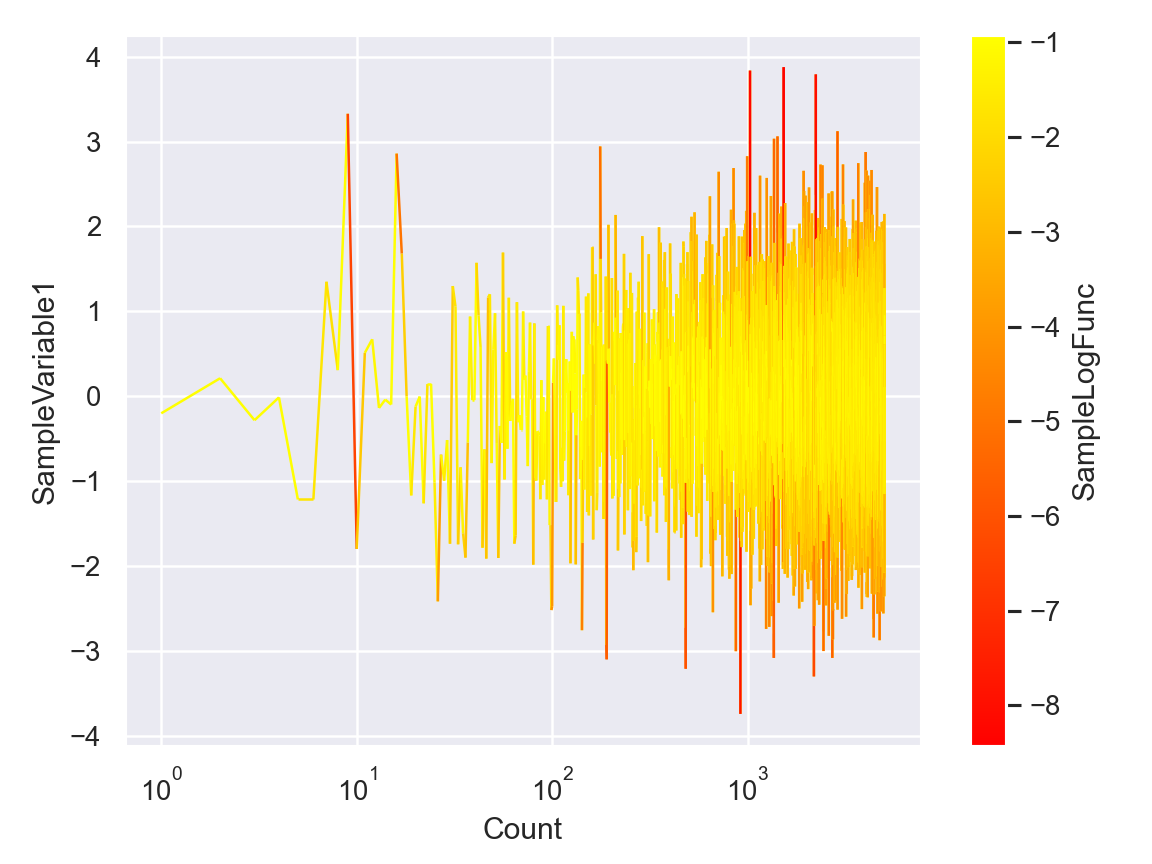

done in 0.160596 seconds.


In [11]:
sample.plot.line()
sample.plot.line.currentFig.axes.set_xscale("log")

By default, the color of the line in the trace-plot will represent the value returned by `getLogFunc()` at the given sampled point. To turn the color off, you can instead try,

In [12]:
sample.plot.line.ccolumns

'SampleLogFunc'

ParaDRAM - NOTE: making the line plot... 

<IPython.core.display.Javascript object>


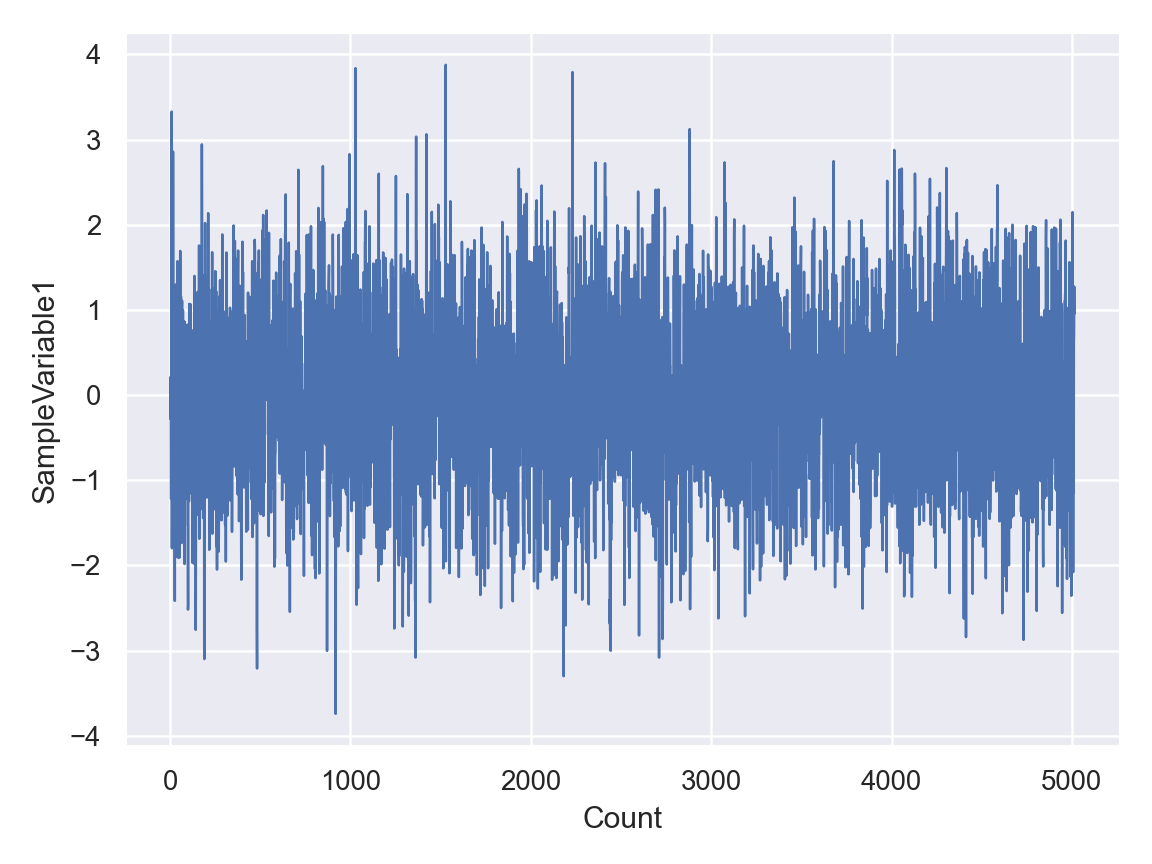

done in 0.087743 seconds.


In [13]:
sample.plot.line.ccolumns = None
sample.plot.line()

There are many other properties of the plot that can be set or modified via the attributes of the `pmpd.sampleList[0].plot.line` object. To see them all, see the documentation of the object,

In [14]:
sample.plot.line.helpme()


Here is the help information on the LineScatterPlot class:



    This is the LineScatterPlot class for generating instances
    of line or scatter plots or the combination of the two in
    two or three dimensions based on the visualization tools
    of the ``matplotlib`` and ``seaborn`` Python libraries.

        **Usage**

            First generate an object of this class by optionally
            passing the following parameters described below. Then call
            the ``make()`` method. The generated object is also callable 
            with the same input parameters as the object's constructor.

        **Parameters**

            plotType

                A string indicating the name of the plot to be constructed.

            dataFrame (optional)

                A pandas dataFrame whose data will be plotted.

            methodName (optional)

                The name of the ParaMonte sample requesting the BasePlot.

            reportEnabled (optional)

                A 

To make a scatter plot of the sampled points, try,

ParaDRAM - NOTE: making the scatter plot... 

<IPython.core.display.Javascript object>


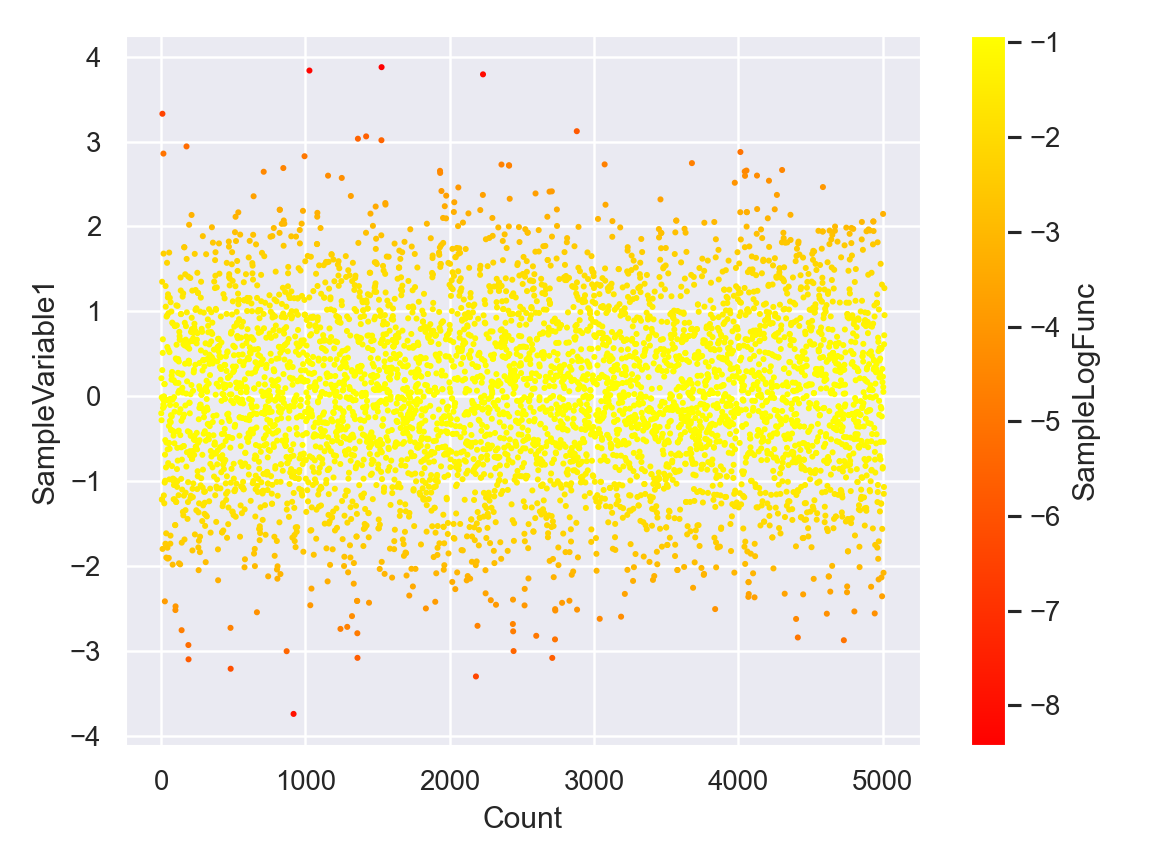

done in 0.127657 seconds.


In [15]:
sample.plot.scatter()

Setting or modifying the properties of the scatter plot are identical to the line plot.

To make kernel density plots of the sampled points, try,

ParaDRAM - NOTE: making the contourf plot... 

<IPython.core.display.Javascript object>


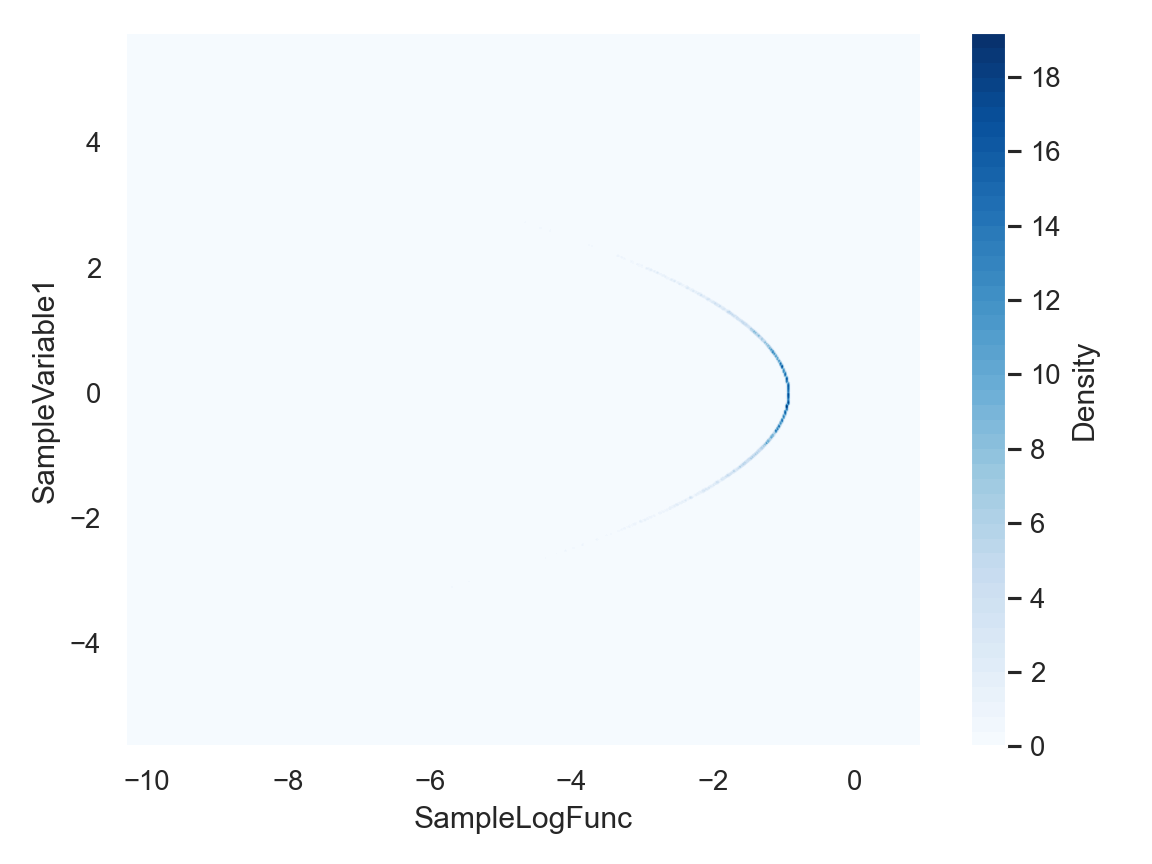

done in 0.466746 seconds.


In [16]:
sample.plot.contourf.reset()
sample.plot.contourf()

Since there is no more than one sampled variable here, the kernel density plot displays `logFunc` vs. `SampleVariable1`. We could make this more interesting by flipping the x and y axes.

ParaDRAM - NOTE: making the contourf plot... 

<IPython.core.display.Javascript object>


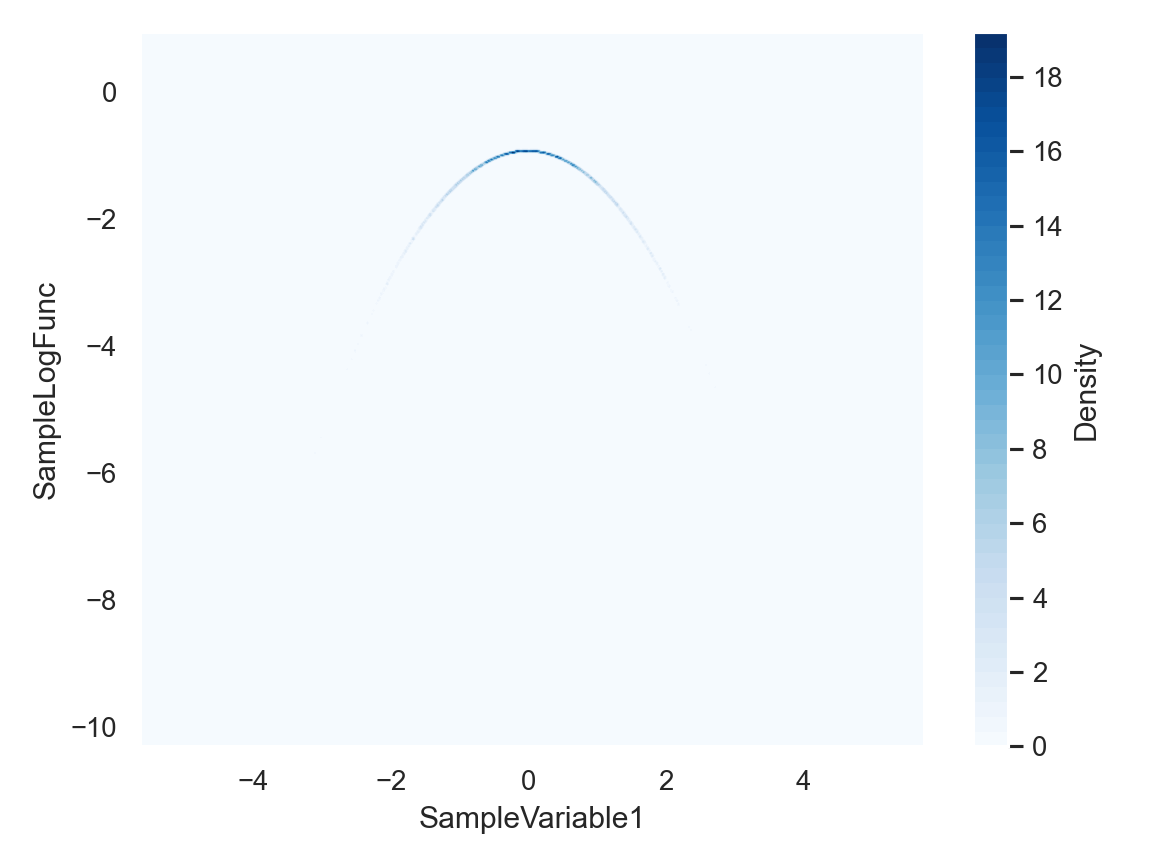

done in 0.5346 seconds.


In [17]:
sample.plot.contourf( ycolumns = 0 # the index of SampleLogFunc column, 
                    , xcolumns = "SampleVariable1" # the index 1 would be also possible
                    )

To compute and visualize the autocorrelation of the sampled points, try,  

ParaDRAM - NOTE: adding the autocrrelation graphics tools... 
ParaDRAM - NOTE: creating a line plot object from scratch... done in 0.0 seconds.
ParaDRAM - NOTE: creating a scatter plot object from scratch... done in 0.0 seconds.
ParaDRAM - NOTE: creating a lineScatter plot object from scratch... done in 0.0 seconds.
ParaDRAM - NOTE: making the line plot... 

<IPython.core.display.Javascript object>


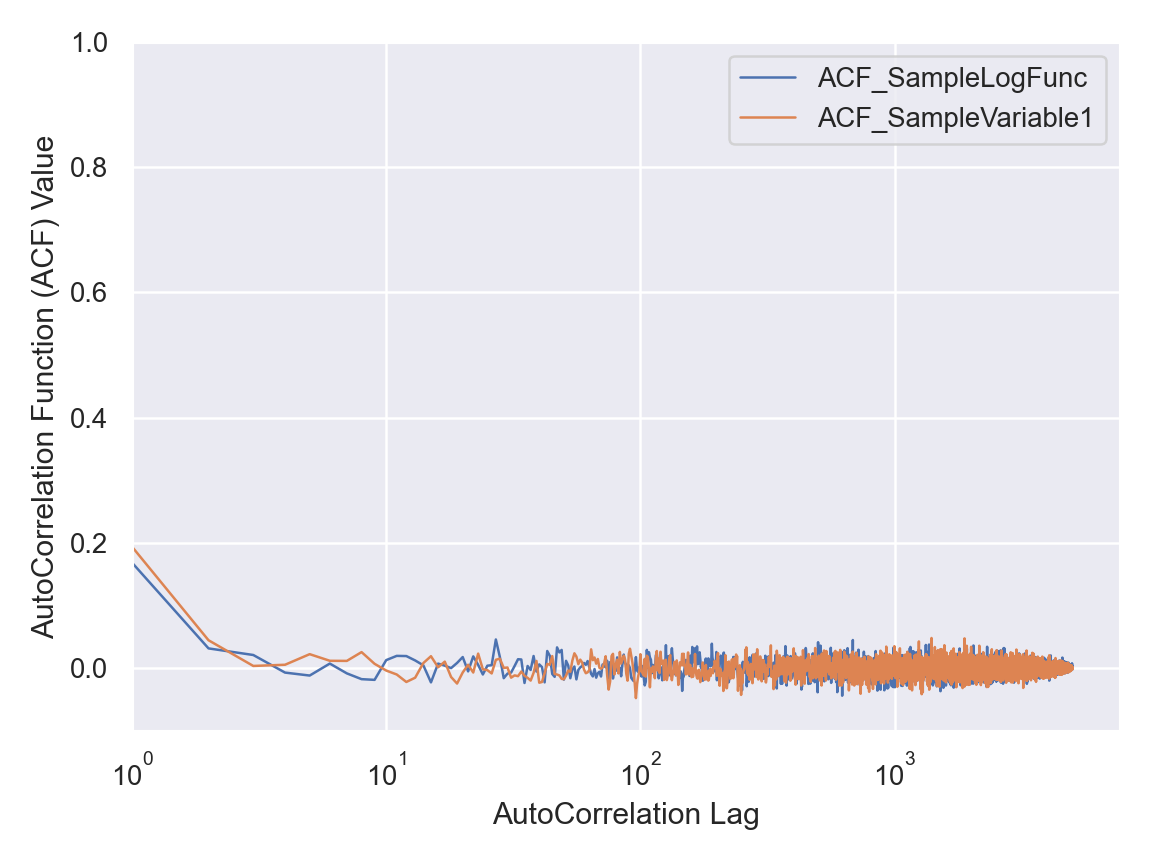

done in 0.304182 seconds.


In [18]:
sample.stats.autocorr()
sample.stats.autocorr.plot.line()
sample.stats.autocorr.plot.line.currentFig.axes.set_xscale("log")

The above AutoCorrelation plot is reassuring since the sampled points do not appear to be correlated with each other at all. This is because the ParaDRAM routine, by default, applies as many rounds of Markov chain refinement as necessary to remove any residual correlations from the final output random sample.

To get the statistics of the maximum of the function, try,

In [19]:
print( "maxLogFunc: {}".format(pmpd.sampleList[0].stats.maxLogFunc.value) )
print( "The location of maxLogFunc: {}".format(pmpd.sampleList[0].stats.maxLogFunc.state.values) )

maxLogFunc: -0.91893855
The location of maxLogFunc: [-0.00015533]


which is again reassuring since we already know that the maximum of the standard Gaussian distribution happens at zero, which is very close to the ParaDRAM sampler's estimated location of maxLogFunc in the above.

>**There are many more functionalities and features of the ParaMonte library that were neither explored nor mentioned in this simple Jupyter notebook example. You can explore them by checking the existing components of each attribute of the ParaDRAM sampler class and by visiting the [ParaMonte library's documentation website](http://cdslab.org/paramonte/)**.